# San Francisco bike sharing system analysis
### by Javier Alonso

This notebook analyzes data provided by [Kaggle](https://www.kaggle.com/usdot/flight-delays/data) of data from all flights in the US in 2015 and we´ll try to analyze the delays and the causes of them

We do the ETL in this notebook.

I´ve done the ETL in Jupyter Notebook placed in https://github.com/canceleiro/Flights-information

I´ve done the EDA in Tableau:

- Per month: https://public.tableau.com/profile/javier.alonso#!/vizhome/Flight_Analysis_15854722426730/permonth
- Per airline: https://public.tableau.com/profile/javier.alonso#!/vizhome/Flight_Analysis_15854722426730/perairline
- Per origin dashboard: https://public.tableau.com/profile/javier.alonso#!/vizhome/Flight_Analysis_15854722426730/Origin
- Per destination dashboard: https://public.tableau.com/profile/javier.alonso#!/vizhome/Flight_Analysis_15854722426730/Destination
- Story: https://public.tableau.com/profile/javier.alonso#!/vizhome/Flight_Analysis_15854722426730/Story
## Table of Contents

1.-[Gathering Data](#Gathering_Data)<br>
2.-[Assesing and Cleaning Data](#Assesing_cleaning_data)<br>
3.-[Consolidation of Dataframes](#Consolidaion_dataframes)<br>


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

### <a class="anchor" id="Gathering_Data"> 1.- Gathering Data

In this section I will gather data from all the files available from years 2018 and 2019

First, I import the 2019 data

In [91]:
df = pd.read_csv('flights.csv')
df_al = pd.read_csv('airlines.csv')
df_ap = pd.read_csv('airports.csv')

C:\Users\Telu Teruno\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [92]:
print("The initial shape of the flight database is",df.shape)

The initial shape of the flight database is (5819079, 31)


Initial actions:

- Change the columns names
- Drop the three first columns

In [93]:
df.columns = [i.replace(' ', '_').lower() for i in df.columns]
df_ap.columns = [i.replace(' ', '_').lower() for i in df_ap.columns]
df_al.columns = [i.replace(' ', '_').lower() for i in df_al.columns]

In [94]:
df.head()

,year,month,day,day_of_week,airline,flight_number,tail_number,origin_airport,destination_airport,scheduled_departure,...,arrival_time,arrival_delay,diverted,cancelled,cancellation_reason,air_system_delay,security_delay,airline_delay,late_aircraft_delay,weather_delay
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


### <a class="anchor" id="Assesing_cleaning_data"> 2.- Asessing and cleaning data

After gathering each of the above pieces of data, I´ve assessed them visually and programmatically for quality and tidiness issues, and clean the issues

First thing I do a copy of my dataframe


In [95]:
df_clean = df.copy()

#### Fixing null values

I fix the null values in the columns that we´re interested in

- I drop the rows where there is no departure time, arrival time or arrival delay as they are not too many 

In [96]:
df_clean.isnull().sum()/len(df_clean)

year                   0.000000
month                  0.000000
day                    0.000000
day_of_week            0.000000
airline                0.000000
flight_number          0.000000
tail_number            0.002530
origin_airport         0.000000
destination_airport    0.000000
scheduled_departure    0.000000
departure_time         0.014805
departure_delay        0.014805
taxi_out               0.015303
wheels_off             0.015303
scheduled_time         0.000001
elapsed_time           0.018056
air_time               0.018056
distance               0.000000
wheels_on              0.015898
taxi_in                0.015898
scheduled_arrival      0.000000
arrival_time           0.015898
arrival_delay          0.018056
diverted               0.000000
cancelled              0.000000
cancellation_reason    0.984554
air_system_delay       0.817250
security_delay         0.817250
airline_delay          0.817250
late_aircraft_delay    0.817250
weather_delay          0.817250
dtype: f

In [97]:
df_clean = df_clean[df_clean.departure_time.notnull()]
df_clean = df_clean[df_clean.arrival_time.notnull()]
df_clean = df_clean[df_clean.arrival_delay.notnull()]

- I place a 0 where there´s a NaN in columns air_system_delay,security_delay,airline_delay,late_aircraft_delay,weather_delay 

In [98]:
df_clean.air_system_delay.fillna(0, inplace=True)
df_clean.security_delay.fillna(0, inplace=True)
df_clean.airline_delay.fillna(0, inplace=True)
df_clean.late_aircraft_delay.fillna(0, inplace=True)
df_clean.weather_delay.fillna(0, inplace=True)


- I drop the columns with elapsed time and air time is null, as they are less than 2% of total

In [99]:
df_clean = df_clean[df_clean.elapsed_time.notnull()]

In [100]:
df_clean.isnull().sum()/len(df_clean)

year                   0.0
month                  0.0
day                    0.0
day_of_week            0.0
airline                0.0
flight_number          0.0
tail_number            0.0
origin_airport         0.0
destination_airport    0.0
scheduled_departure    0.0
departure_time         0.0
departure_delay        0.0
taxi_out               0.0
wheels_off             0.0
scheduled_time         0.0
elapsed_time           0.0
air_time               0.0
distance               0.0
wheels_on              0.0
taxi_in                0.0
scheduled_arrival      0.0
arrival_time           0.0
arrival_delay          0.0
diverted               0.0
cancelled              0.0
cancellation_reason    1.0
air_system_delay       0.0
security_delay         0.0
airline_delay          0.0
late_aircraft_delay    0.0
weather_delay          0.0
dtype: float64

In [101]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5714008 entries, 0 to 5819078
Data columns (total 31 columns):
year                   int64
month                  int64
day                    int64
day_of_week            int64
airline                object
flight_number          int64
tail_number            object
origin_airport         object
destination_airport    object
scheduled_departure    int64
departure_time         float64
departure_delay        float64
taxi_out               float64
wheels_off             float64
scheduled_time         float64
elapsed_time           float64
air_time               float64
distance               int64
wheels_on              float64
taxi_in                float64
scheduled_arrival      int64
arrival_time           float64
arrival_delay          float64
diverted               int64
cancelled              int64
cancellation_reason    object
air_system_delay       float64
security_delay         float64
airline_delay          float64
late_aircraft

#### Datatypes

- Multiple fields must be integers, instead of float: 


In [102]:
df_clean.departure_time = df_clean.departure_time.astype(int)
df_clean.departure_delay = df_clean.departure_delay.astype(int)
df_clean.taxi_out = df_clean.taxi_out.astype(int)
df_clean.wheels_off = df_clean.wheels_off.astype(int)
df_clean.scheduled_time = df_clean.scheduled_time.astype(int)
df_clean.elapsed_time = df_clean.elapsed_time.astype(int)
df_clean.air_time = df_clean.air_time.astype(int)
df_clean.wheels_on = df_clean.wheels_on.astype(int)
df_clean.taxi_in = df_clean.taxi_in.astype(int)
df_clean.arrival_time = df_clean.arrival_time.astype(int)
df_clean.arrival_delay = df_clean.arrival_delay.astype(int)
df_clean.air_system_delay = df_clean.air_system_delay.astype(int)
df_clean.security_delay = df_clean.security_delay.astype(int)
df_clean.airline_delay = df_clean.airline_delay.astype(int)
df_clean.late_aircraft_delay = df_clean.late_aircraft_delay.astype(int)
df_clean.weather_delay = df_clean.weather_delay.astype(int)

#### Delete not useful columns

There are columns that can be removed, because the data is not useful


- cancelled: all values are zero, as we deleleted the cancellations
- cancellation_reason: all are nulls, as we deleted the cancellations
- diverted: all values are zero



In [106]:
df_clean = df_clean.drop(['cancelled', 'cancellation_reason','diverted'], axis=1)

In [107]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5714008 entries, 0 to 5819078
Data columns (total 28 columns):
year                   int64
month                  int64
day                    int64
day_of_week            int64
airline                object
flight_number          int64
tail_number            object
origin_airport         object
destination_airport    object
scheduled_departure    int64
departure_time         int32
departure_delay        int32
taxi_out               int32
wheels_off             int32
scheduled_time         int32
elapsed_time           int32
air_time               int32
distance               int64
wheels_on              int32
taxi_in                int32
scheduled_arrival      int64
arrival_time           int32
arrival_delay          int32
air_system_delay       int32
security_delay         int32
airline_delay          int32
late_aircraft_delay    int32
weather_delay          int32
dtypes: int32(16), int64(8), object(4)
memory usage: 915.5+ MB


#### Create date column

In [108]:
df_clean['date'] = pd.to_datetime(df_clean[["year", "month", "day"]])

#### Check duplicates

In [109]:
df_clean[df_clean.duplicated()]

,year,month,day,day_of_week,airline,flight_number,tail_number,origin_airport,destination_airport,scheduled_departure,...,taxi_in,scheduled_arrival,arrival_time,arrival_delay,air_system_delay,security_delay,airline_delay,late_aircraft_delay,weather_delay,date


#### Arrival delay outliers
We want to analyze the main reasons of the delays, so we are going to remove outliers of the delays.

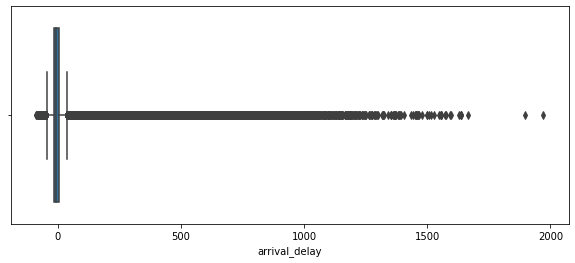

In [110]:
plt.figure(figsize=(10,4))
sb.boxplot(x=df_clean.arrival_delay);

- We could delete some of the outliers with very high delay, but for the moment we leave them, in case they have useful info
- We input a cero delay in the ones that departed earlier than the scheduled time, so they count as not delayed, that it´s what we are going to analyze

In [111]:
df_clean['arrival_delay'] = df_clean.arrival_delay.map(lambda x: 0 if x<0 else x)

In [112]:
df_clean.arrival_delay.describe()

count    5.714008e+06
mean     1.209368e+01
std      3.574761e+01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      8.000000e+00
max      1.971000e+03
Name: arrival_delay, dtype: float64

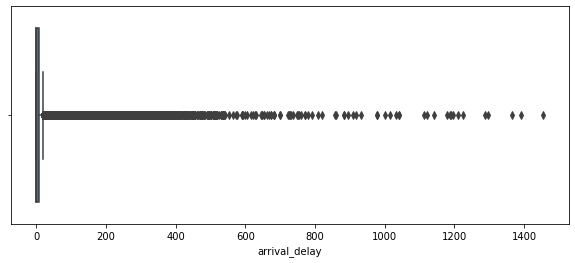

In [23]:
plt.figure(figsize=(10,4))
sb.boxplot(x=df_clean.arrival_delay);

In [113]:
print("The final shape of the database is",df_clean.shape)

The final shape of the database is (5714008, 29)


In [114]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5714008 entries, 0 to 5819078
Data columns (total 29 columns):
year                   int64
month                  int64
day                    int64
day_of_week            int64
airline                object
flight_number          int64
tail_number            object
origin_airport         object
destination_airport    object
scheduled_departure    int64
departure_time         int32
departure_delay        int32
taxi_out               int32
wheels_off             int32
scheduled_time         int32
elapsed_time           int32
air_time               int32
distance               int64
wheels_on              int32
taxi_in                int32
scheduled_arrival      int64
arrival_time           int32
arrival_delay          int64
air_system_delay       int32
security_delay         int32
airline_delay          int32
late_aircraft_delay    int32
weather_delay          int32
date                   datetime64[ns]
dtypes: datetime64[ns](1), int32(

#### Airports database

We can see there are three airports without latitude and longitude. We are going to collect this data through Google Maps and fill it

In [115]:
df_ap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 7 columns):
iata_code    322 non-null object
airport      322 non-null object
city         322 non-null object
state        322 non-null object
country      322 non-null object
latitude     319 non-null float64
longitude    319 non-null float64
dtypes: float64(2), object(5)
memory usage: 17.7+ KB


In [116]:
df_ap.head()

,iata_code,airport,city,state,country,latitude,longitude
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447


In [117]:
df_ap[df_ap.longitude.isnull()]

,iata_code,airport,city,state,country,latitude,longitude
96,ECP,Northwest Florida Beaches International Airport,Panama City,FL,USA,NaN,NaN
234,PBG,Plattsburgh International Airport,Plattsburgh,NY,USA,NaN,NaN
313,UST,Northeast Florida Regional Airport (St. August...,St. Augustine,FL,USA,NaN,NaN


In [118]:
df_ap.set_value(96, 'latitude', 30.353873)
df_ap.set_value(96, 'longitude', -85.798894)
df_ap.set_value(234, 'latitude', 44.652411)
df_ap.set_value(234, 'longitude', -73.468458)
df_ap.set_value(313, 'latitude', 29.954715)
df_ap.set_value(313, 'longitude', -81.342849)

C:\Users\Telu Teruno\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  """Entry point for launching an IPython kernel.
C:\Users\Telu Teruno\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
C:\Users\Telu Teruno\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Telu Teruno\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  after removing the cwd from sys.path.
C:\Users\Telu Teruno\Anaconda

,iata_code,airport,city,state,country,latitude,longitude
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447
...,...,...,...,...,...,...,...
317,WRG,Wrangell Airport,Wrangell,AK,USA,56.48433,-132.36982
318,WYS,Westerly State Airport,West Yellowstone,MT,USA,44.68840,-111.11764
319,XNA,Northwest Arkansas Regional Airport,Fayetteville/Springdale/Rogers,AR,USA,36.28187,-94.30681
320,YAK,Yakutat Airport,Yakutat,AK,USA,59.50336,-139.66023


In [119]:
df_ap.iloc[[96,234,313]]

,iata_code,airport,city,state,country,latitude,longitude
96,ECP,Northwest Florida Beaches International Airport,Panama City,FL,USA,30.353873,-85.798894
234,PBG,Plattsburgh International Airport,Plattsburgh,NY,USA,44.652411,-73.468458
313,UST,Northeast Florida Regional Airport (St. August...,St. Augustine,FL,USA,29.954715,-81.342849


In [120]:
df_ap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 7 columns):
iata_code    322 non-null object
airport      322 non-null object
city         322 non-null object
state        322 non-null object
country      322 non-null object
latitude     322 non-null float64
longitude    322 non-null float64
dtypes: float64(2), object(5)
memory usage: 17.7+ KB


### <a class="anchor" id="Consolidaion_dataframes"> 3.- Consolidation of dataframes

In this section I´m going to consolidate both dataframes into files, that I´ll read for the next sections

In [124]:
df_clean.to_csv('flights_clean.csv', index = False)
df_ap.to_csv('airports_clean.csv', index = False)

In [2]:
df = pd.read_csv('flights_clean.csv')

C:\Users\Telu Teruno\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [7]:
df[df.arrival_delay > 0].shape

(2086896, 29)

In [8]:
df.shape

(5714008, 29)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5714008 entries, 0 to 5714007
Data columns (total 29 columns):
year                   int64
month                  int64
day                    int64
day_of_week            int64
airline                object
flight_number          int64
tail_number            object
origin_airport         object
destination_airport    object
scheduled_departure    int64
departure_time         int64
departure_delay        int64
taxi_out               int64
wheels_off             int64
scheduled_time         int64
elapsed_time           int64
air_time               int64
distance               int64
wheels_on              int64
taxi_in                int64
scheduled_arrival      int64
arrival_time           int64
arrival_delay          int64
air_system_delay       int64
security_delay         int64
airline_delay          int64
late_aircraft_delay    int64
weather_delay          int64
date                   object
dtypes: int64(24), object(5)
memory usage

In [10]:
df[['departure_delay','arrival_delay','air_system_delay','security_delay','airline_delay','late_aircraft_delay','weather_delay']]

,departure_delay,arrival_delay,air_system_delay,security_delay,airline_delay,late_aircraft_delay,weather_delay
0,-11,0,0,0,0,0,0
1,-8,0,0,0,0,0,0
2,-2,5,0,0,0,0,0
3,-5,0,0,0,0,0,0
4,-1,0,0,0,0,0,0
...,...,...,...,...,...,...,...
5714003,-4,0,0,0,0,0,0
5714004,-4,0,0,0,0,0,0
5714005,-9,0,0,0,0,0,0
5714006,-6,0,0,0,0,0,0
